In [1]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import sympy as sym
from sympy import symbols
from scipy.optimize import fsolve

In [74]:
#b, psi, xi, d, fcd, beta, As, fyd, d2, MEd, mylambda, x, A1s, Es, epsilon_su = symbols('b psi xi d fcd beta As fyd d2 MEd mylambda x A1s Es, epsilon_su')


In [245]:
def design():
    b = float(input('b = [mm]'))
    fck = float(input('fck = [MPa]'))
    fcd = round(fck*.85/1.5, 2)
    fyk = float(input('fyk = [MPa]'))
    fyd = round(fyk/1.15, 2)
    d2 = float(input('d2 = [mm]'))
    Es = float(input('Es = [GPa]'))*10**3
    epsilon_se = fyd/Es
    epsilon_su = float(input('epsilon_su = [per thousand]'))/1000
    epsilon_c2 = float(input('epsilon_c2 = [per thousand]'))/1000
    epsilon_cu = float(input('epsilon_cu = [per thousand]'))/1000
    beta = float(input('beta = A1s/As = '))
    MEd = abs(float(input('MEd = [kNm]'))*10**6)
    d = input(f'd = [mm] (empty if unknown)')    
    
    xi_23 = .2593;
    
    psi = 0.80952;
    mylambda = 0.416;
    xi = xi_23;
    
    if d == '':
        d = symbols('d')
        
        dd = sym.solve(b*psi*xi*d**2 *fcd*(1-mylambda*xi) + beta* ((b*psi*xi*d*fcd)/(1-beta)) *(d-d2) - MEd, d)
        d = list(filter(lambda val: val >= 0, dd))[0]
        print('\n\nd = ', d, 'mm\n')
        As_0 = b*psi*xi*d*fcd/((1-beta)*fyd);
        A1s_0 = beta*As_0;
        print('As = ',As_0,'mm^2\nA1s = ', A1s_0,'mm^2')
        
#------------------As----------------------------------

        def steel_area():        
            print('\nInsert integer number of tensed steel reinforcement (>=2): ')
            num_As = int(input('n.:'))

            
            if (num_As < 2):
                i=0;
                while i<3:
                    print('\nMinumum bars number must be greater or at least equal 2: ')
                    num_As = int(input('n.:'))
                    i+=1;
                if i==3:
                    num_As = 2;
                    print('\nNumber of tensed bars has been set to ', num_As)


            print('\nInsert tensed bars diameter (even number >= 12mm): ')
            phi_As = int(input('Phi = '))


            
            if (phi_As % 2) != 0 or phi_As < 12:
                i=0;
                while i<3:
                    print('\nDiameter must be even and greater than 12mm): ')
                    phi_As = int(input('Phi = '))
                    i+=1;
                if i==3:
                    phi_As = 12;
                    print('\nDiameter of tensed bars has been set to ', phi_As, 'mm')
            
            As = round(num_As * np.pi * phi_As**2 /4,4)
            print('\nAs = ',num_As,'ϕ',phi_As,'mm = ',As,'mm^2\n')
            

#--------------------------------------------------------------------------------

#------------------A1s----------------------------------
        def steel1_area():
            print('Insert integer number of compressed steel reinforcement (>=2): ')
            num_A1s = int(input('n.:'))


            if (num_A1s < 2):
                i=0;
                while i<3:
                    print('\nMinumum bars number must be greater or at least equal 2: ')
                    num_A1s = int(input('n.: '))
                    i+=1;

                if i==3:
                    num_A1s = 2;
                    print('\nNumber of compressed bars has been set to ', num_A1s)


            print('\nInsert compressed bars diameter (even number >= 12mm): ')
            phi_A1s = int(input('Phi = '))


            if (phi_A1s % 2) != 0 or phi_A1s < 12:
                i=0;
                while i<3:                
                    print('\nDiameter must be even and greater than 12mm): ')
                    phi_A1s = int(input('Phi = '))
                    i+=1;
                if i==3:
                    phi_A1s = 12;
                    print('\nDiameter of compressed bars has been set to ', phi_A1s, 'mm')
                    
            A1s = round(num_A1s * np.pi * phi_A1s**2 /4,4)
            print('\nA1s = ',num_A1s,'ϕ',phi_A1s,'mm = ',A1s,'mm^2\n')
                       
#----------------------------------------------------------------------------

        steel_area()
    
        steel1_area()
        
        
        
        if As < As_0:
            print(As,'<',As_0,'\nMore bars needed')
            steel_area()
            
        if A1s < A1s_0:
            print(A1s,'<',A1s_0,'\nMore bars needed')
            steel1_area()

        
            
        

In [246]:
design()

b = [mm] 300
fck = [MPa] 25
fyk = [MPa] 450
d2 = [mm] 40
Es = [GPa] 210
epsilon_su = [per thousand] 10
epsilon_c2 = [per thousand] 2
epsilon_cu = [per thousand] 3.5
beta = A1s/As =  .3
MEd = [kNm] 234.169
d = [mm] (empty if unknown) 




d =  452.297790574483 mm

As =  1473.45807437857 mm^2
A1s =  442.037422313570 mm^2

Insert integer number of tensed steel reinforcement (>=2): 


n.: 4



Insert tensed bars diameter (even number >= 12mm): 


Phi =  12



As =  4 ϕ 12 mm =  452.3893 mm^2

Insert integer number of compressed steel reinforcement (>=2): 


n.: 4



Insert compressed bars diameter (even number >= 12mm): 


Phi =  12



A1s =  4 ϕ 12 mm =  452.3893 mm^2

226.1947 < 1473.45807437857 
More bars needed

Insert integer number of tensed steel reinforcement (>=2): 


n.: 6



Insert tensed bars diameter (even number >= 12mm): 


Phi =  18



As =  6 ϕ 18 mm =  1526.814 mm^2

226.1947 < 442.037422313570 
More bars needed
Insert integer number of compressed steel reinforcement (>=2): 


n.: 2



Insert compressed bars diameter (even number >= 12mm): 


Phi =  18



A1s =  2 ϕ 18 mm =  508.938 mm^2



In [240]:
A1s = round(num_A1s * np.pi * phi_A1s**2 /4,4)
A1s

226.1947

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [17]:
X = np.arange(1, 2.5, .5)
Y = 1/np.tan([np.pi/4, np.pi/3, np.pi/2])

func = (X+ Y) * 1/(1+X**2)

len(func)

3

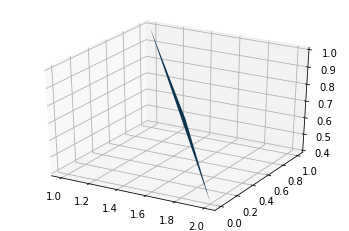

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(X,Y, func)